## Project 4
## Group: Jingmin Chen, Jiaqi Min, Yusen Wu

### Phase 1

In [66]:
# import python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


Use pd.read_csv to load dataset

In [67]:
# load dataset
mr_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",header = None)
# priny first 5 rows
mr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Create a subset of 4 columns and use the 'copy()' function to preserve the original data frame

In [68]:
# use df.iloc select 0,1,3,5 columns
mr_sub = mr_df.iloc[:, [0, 1, 3, 5]].copy()
mr_sub.head()

,0,1,3,5
0,p,x,n,p
1,e,x,y,a
2,e,b,w,l
3,p,x,w,p
4,e,x,g,n


Add meaningful column names

In [69]:
mr_sub.columns = ['IsPoisonous', 'Cap_Shape', 'Cap_Color', 'Odor']
# print first 5 rows
mr_sub.head()

,IsPoisonous,Cap_Shape,Cap_Color,Odor
0,p,x,n,p
1,e,x,y,a
2,e,b,w,l
3,p,x,w,p
4,e,x,g,n


Use replace function to replace the dataframe's vlaue

In [70]:
# replace Edible col values
mr_sub.IsPoisonous.replace('e', '0', inplace = True)
mr_sub.IsPoisonous.replace('p', '1', inplace = True)

# replace Cap Shape col values
mr_sub.Cap_Shape.replace('b', 'bell', inplace = True)
mr_sub.Cap_Shape.replace('c', 'conical', inplace = True)
mr_sub.Cap_Shape.replace('x', 'convex', inplace = True)
mr_sub.Cap_Shape.replace('f', 'flat', inplace = True)
mr_sub.Cap_Shape.replace('k', 'knobbed', inplace = True)
mr_sub.Cap_Shape.replace('s', 'sunken', inplace = True)

# replace Cap Color col values
mr_sub.Cap_Color.replace({'n': 'brown', 
                             'b': 'buff',
                             'c': 'cinnamon',
                             'g': 'gray',
                             'r': 'green',
                             'p': 'pink',
                             'u': 'purple',
                             'e': 'red',
                             'w': 'white',
                             'y': 'yellow'}, inplace = True)

# replace Oder col values
mr_sub.Odor.replace({'a': 'almond', 
                     'l': 'anise',
                     'c': 'creosote',
                     'y': 'fishy',
                     'f': 'foul',
                     'm': 'musty',
                     'n': 'none',
                     'p': 'pungent',
                     's': 'spicy'}, inplace = True)
# print first 5 rows
mr_sub.head()

,IsPoisonous,Cap_Shape,Cap_Color,Odor
0,1,convex,brown,pungent
1,0,convex,yellow,almond
2,0,bell,white,anise
3,1,convex,white,pungent
4,0,convex,gray,none


Use get_dummies function to store values as numerics to 'a'

In [71]:
# use get_dummies function
a = pd.get_dummies(mr_sub)
#print the columns name of a 
print(a.columns)
#print the first 5 rows
a.head()

Index(['IsPoisonous_0', 'IsPoisonous_1', 'Cap_Shape_bell', 'Cap_Shape_conical',
       'Cap_Shape_convex', 'Cap_Shape_flat', 'Cap_Shape_knobbed',
       'Cap_Shape_sunken', 'Cap_Color_brown', 'Cap_Color_buff',
       'Cap_Color_cinnamon', 'Cap_Color_gray', 'Cap_Color_green',
       'Cap_Color_pink', 'Cap_Color_purple', 'Cap_Color_red',
       'Cap_Color_white', 'Cap_Color_yellow', 'Odor_almond', 'Odor_anise',
       'Odor_creosote', 'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none',
       'Odor_pungent', 'Odor_spicy'],
      dtype='object')


,IsPoisonous_0,IsPoisonous_1,Cap_Shape_bell,Cap_Shape_conical,Cap_Shape_convex,Cap_Shape_flat,Cap_Shape_knobbed,Cap_Shape_sunken,Cap_Color_brown,Cap_Color_buff,...,Cap_Color_yellow,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Use describe() function to show the detail of mr_sub and a, there are total 8124 mushrooms, edible or poisonous, six different Cap_shape, 10 different Cap_Color, 9 different Odor, edible, convex Cap_Shape, brown Cap_Color, none Oder are most frequency

In [72]:
# show the detail of mr_sub
mr_sub.describe()

,IsPoisonous,Cap_Shape,Cap_Color,Odor
count,8124,8124,8124,8124
unique,2,6,10,9
top,0,convex,brown,none
freq,4208,3656,2284,3528


In [73]:
#show the detail of a
a.describe()

,IsPoisonous_0,IsPoisonous_1,Cap_Shape_bell,Cap_Shape_conical,Cap_Shape_convex,Cap_Shape_flat,Cap_Shape_knobbed,Cap_Shape_sunken,Cap_Color_brown,Cap_Color_buff,...,Cap_Color_yellow,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.450025,0.387986,0.101920,0.003939,0.281142,0.020679,...,0.131955,0.049237,0.049237,0.023634,0.070901,0.265879,0.004431,0.434269,0.031512,0.070901
std,0.499708,0.499708,0.229235,0.022185,0.497527,0.487321,0.302562,0.062641,0.449584,0.142318,...,0.338462,0.216375,0.216375,0.151914,0.256675,0.441827,0.066425,0.495691,0.174706,0.256675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Use seaborn to show the distribution of data for each of the columns, create a 2*2 subplot first, and then plot the IsPoisonous Distribution, Mushroom Cap Shape Distribution, Mushroom Cap Color Distribution and Mushroom Odor Distribution

Finding:
The amount of edible is greater than the poisonous, For the mushroom cap shape, most of cap shape are convex and flat, for the mushroom cap color, the total amount of buff + pink + cinnamon +purple + green are less than 10%, for the mushroom Order, 40% of mushroom are none odor

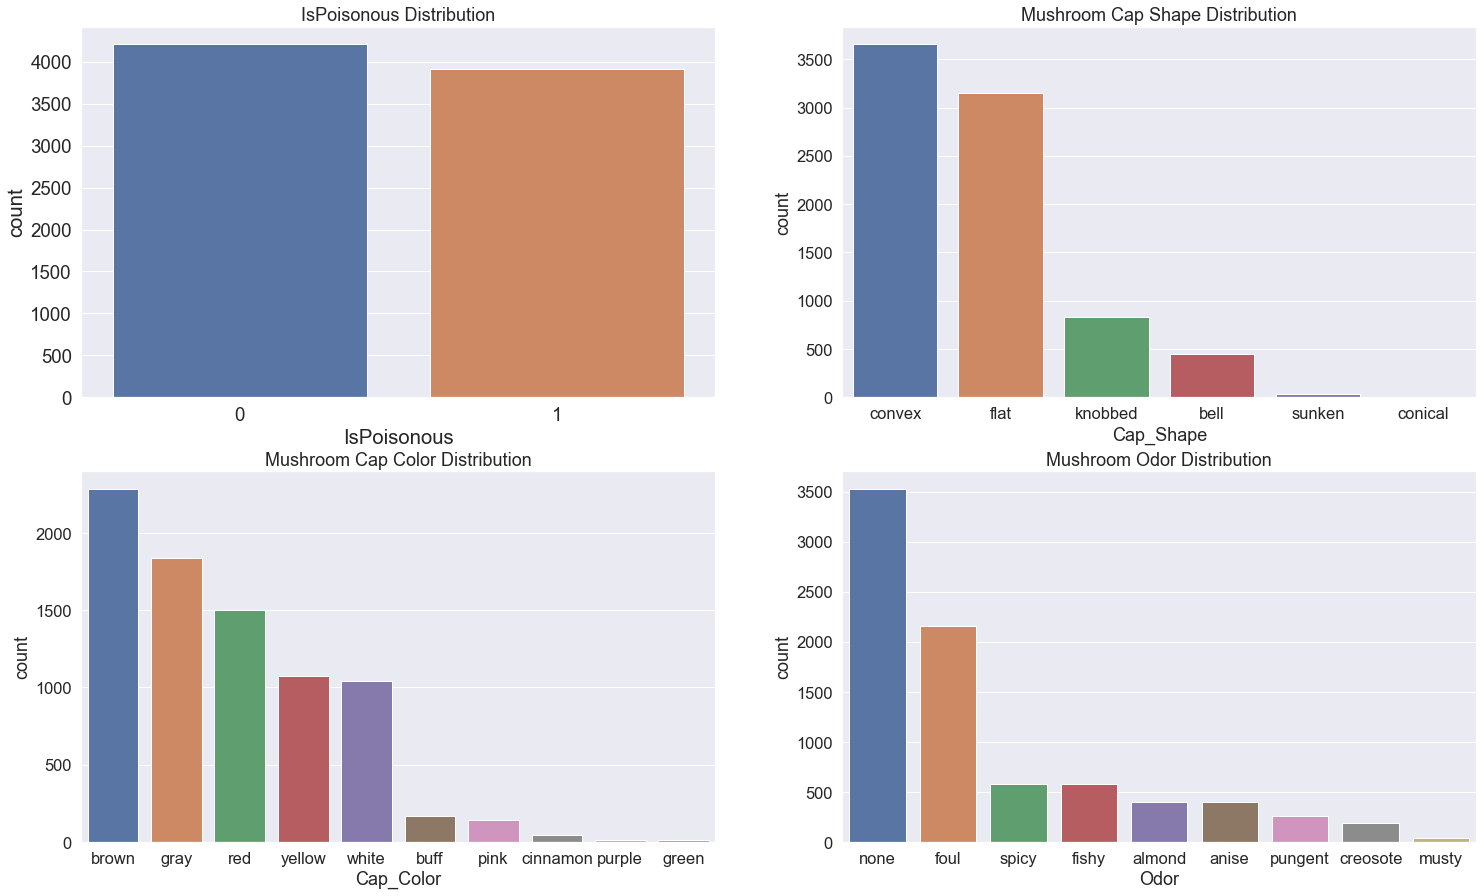

In [74]:
# define the plot size
plt.figure(figsize=(25,15))

# define a 2*2 subplot, put the plot on upper left position
plt.subplot(221)
# use sns.countplot() funtion to create a plot 
sns.countplot(mr_sub['IsPoisonous'],order = mr_sub['IsPoisonous'].value_counts().index)
# use sns.set() to make the font size visible
sns.set(font_scale = 1.5)
# add a title
plt.title('IsPoisonous Distribution')

# put the plot on upper right position
plt.subplot(222)
# use sns.countplot() funtion to create a plot 
sns.countplot(mr_sub['Cap_Shape'],order = mr_sub['Cap_Shape'].value_counts().index)
# use sns.set() to make the font size visible
sns.set(font_scale = 1.5)
# add a title
plt.title('Mushroom Cap Shape Distribution');

# put the plot on lower left position
plt.subplot(223)
# use sns.countplot() funtion to create a plot 
sns.countplot(mr_sub['Cap_Color'],order = mr_sub['Cap_Color'].value_counts().index)
# use sns.set() to make the font size visible
sns.set(font_scale = 1.5)
# add a title
plt.title('Mushroom Cap Color Distribution');

#s put the plot on lower right position
plt.subplot(224)
# use sns.countplot() funtion to create a plot 
sns.countplot(mr_sub['Odor'],order = mr_sub['Odor'].value_counts().index)
# use sns.set() to make the font size visible
sns.set(font_scale = 1.5)
# add a title
plt.title('Mushroom Odor Distribution');

Use seaborn to show the  poisonous vs. odor as well as the other columns, create a 2*2 subplot first, and then plot the 'poisonous vs odor', 'poisonous vs Cap_Shape', 'poisonous vs Cap_Color', use blue color represent Edible, other color represent Posionous

Finding: most of none, almond and anise odor are edible, for the Cap_Shape, convex and flat both have very high frequency in edible and poisonous, for Cap_color, brown, gray, red, yellow and white color are majority amount of mushroom, but they also have high frequency in both edible and poisonous.

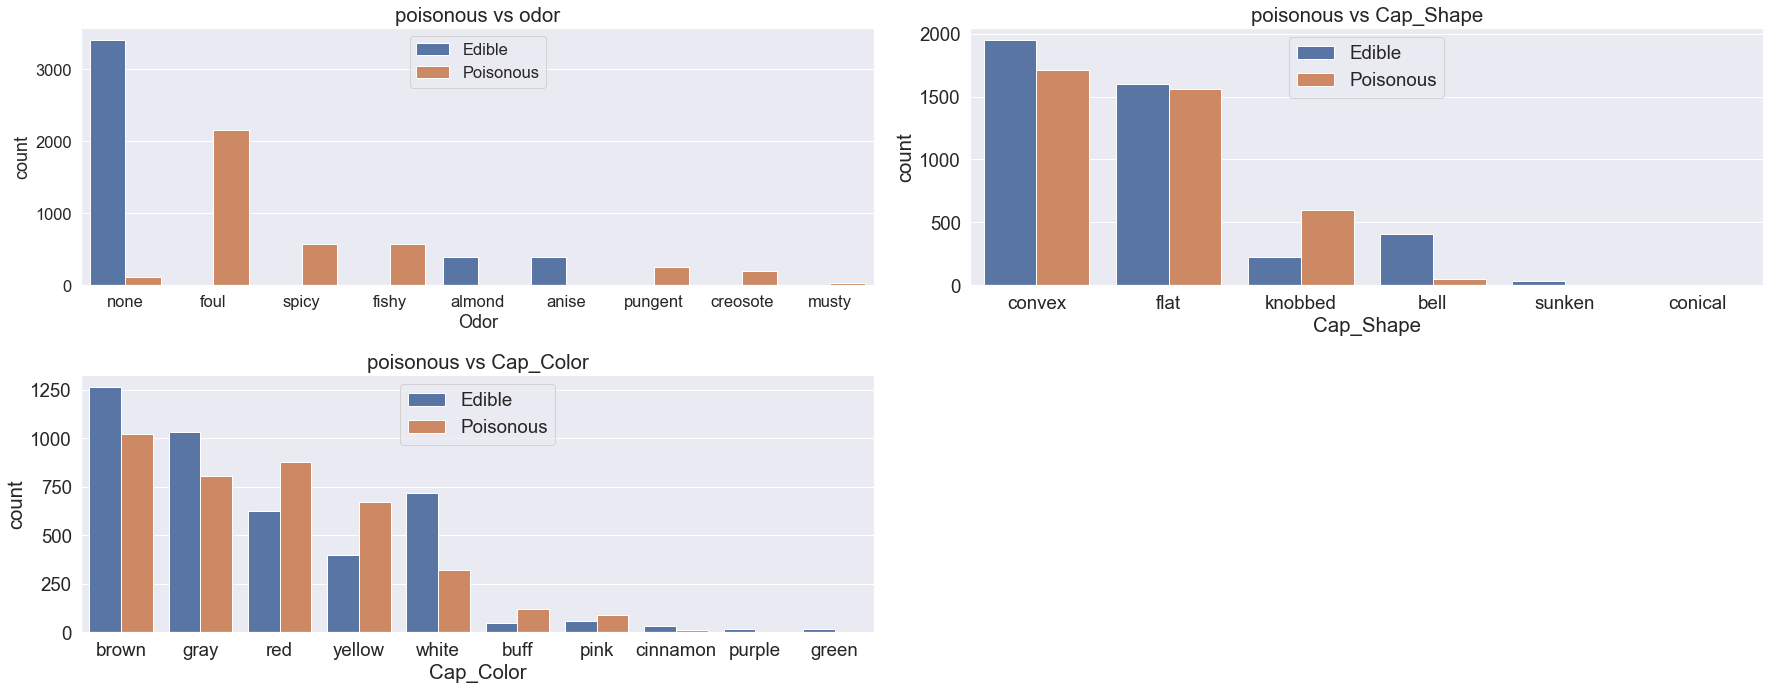

In [75]:
# define the plot size
fig = plt.figure(figsize=(25,10))

# define a 2*2 subplot, put the plot on upper left position
plt.subplot(221)
# use sns.countplot() funtion to create a plot 
sns.countplot(x="Odor", hue="IsPoisonous", data=mr_sub,order = mr_sub['Odor'].value_counts().index)
# add a legend
plt.legend(["Edible", "Poisonous"])
#use sns.set() to make the font size visible
sns.set(font_scale = 1.7)
# add a title
plt.title('poisonous vs odor')


# put the plot on upper right position
plt.subplot(222)
# use sns.countplot() funtion to create a plot 
sns.countplot(x="Cap_Shape", hue="IsPoisonous", data=mr_sub,order = mr_sub['Cap_Shape'].value_counts().index)
# add a legend
plt.legend(["Edible", "Poisonous"])
#use sns.set() to make the font size visible
sns.set(font_scale = 1.7)
# add a title
plt.title('poisonous vs Cap_Shape')


# put the plot on lower left position
plt.subplot(223)
# use sns.countplot() funtion to create a plot 
sns.countplot(x="Cap_Color", hue="IsPoisonous", data=mr_sub,order = mr_sub['Cap_Color'].value_counts().index)
# add a legend
plt.legend(["Edible", "Poisonous"])
#use sns.set() to make the font size visible
sns.set(font_scale = 1.7)
# add a title
plt.title('poisonous vs Cap_Color')


# adjust the gap between each plot
plt.tight_layout()
plt.show()

#### preliminary conclusions:
I think compare with odor,cap_Color, cao_Shape, obviously odor is more clear to predict the the mushroom is edible or poisonous, becaues order don't have high frequency in both edible and poisonous.

### Phase 2

##### Prepare Data for Logistic Regression
To prepare the data, we want to add dummy variables for Odor ,Cap_Color and Cap_Shape, since we treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [76]:
# create dataframes with an intercept column and all dummy variables
y, X = dmatrices('IsPoisonous_1 ~ Cap_Shape_bell + Cap_Shape_conical +\
Cap_Shape_convex + Cap_Shape_flat + Cap_Shape_knobbed+\
Cap_Shape_sunken + Cap_Color_brown + Cap_Color_buff + \
Cap_Color_cinnamon + Cap_Color_gray + Cap_Color_green +\
Cap_Color_pink + Cap_Color_purple + Cap_Color_red +\
Cap_Color_white + Cap_Color_yellow + Odor_almond + Odor_anise +\
Odor_creosote + Odor_fishy + Odor_foul + Odor_musty + Odor_none + \
Odor_pungent + Odor_spicy',a, return_type="dataframe")

X.columns

Index(['Intercept', 'Cap_Shape_bell', 'Cap_Shape_conical', 'Cap_Shape_convex',
       'Cap_Shape_flat', 'Cap_Shape_knobbed', 'Cap_Shape_sunken',
       'Cap_Color_brown', 'Cap_Color_buff', 'Cap_Color_cinnamon',
       'Cap_Color_gray', 'Cap_Color_green', 'Cap_Color_pink',
       'Cap_Color_purple', 'Cap_Color_red', 'Cap_Color_white',
       'Cap_Color_yellow', 'Odor_almond', 'Odor_anise', 'Odor_creosote',
       'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent',
       'Odor_spicy'],
      dtype='object')

In [77]:
# flatten y into a 1-D array
y = np.ravel(y)

In [78]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.9891678975873953

98.9% accuracy seems good, but what's the null error rate?

In [79]:
# what percentage had affairs?
y.mean()

0.48202855736090594

48.2% of the mushrooms in the dataset are poisonous, which means that you could obtain 52 percent accuracy by always predicting "edible". So we're doing better than the null error rate, but not by much.

In [80]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[4.91064162691668e-05]
1,Cap_Shape_bell,[0.8634835970340319]
2,Cap_Shape_conical,[1.739561220225489]
3,Cap_Shape_convex,[-1.2398649557503745]
4,Cap_Shape_flat,[-0.3790118854640187]
5,Cap_Shape_knobbed,[-0.5035369441434733]
6,Cap_Shape_sunken,[-0.4805819254864829]
7,Cap_Color_brown,[-0.974306839369861]
8,Cap_Color_buff,[1.886569678071446]
9,Cap_Color_cinnamon,[-0.5090752477723927]


base on the coefficients examine, I found the Oder is a great predict factor, because the max and min coefficients is 5.17 and -8, the cap shape and color are not a great predict, because the max and min coefficients are (1.74 and -1.24) and (1.88 and -1.86)

#### Model Evaluation Using a Validation Set
So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [81]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities and take a look of it.

In [82]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 1. 1. 1.]


In [83]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.02751422 0.97248578]
 [0.98806424 0.01193576]
 [0.98365367 0.01634633]
 ...
 [0.00244241 0.99755759]
 [0.01529489 0.98470511]
 [0.00793153 0.99206847]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [84]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.9889253486464314
0.9989485231453012


The accuracy is 98%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [85]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[1272    0]
 [  27 1139]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1272
         1.0       1.00      0.98      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



#### Model Evaluation Using Cross-Validation
Now we do 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [86]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(solver='lbfgs'), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[1.         1.         0.99507995 0.99138991 0.94341943 0.93726937
 1.         1.         0.89889026 0.99753391]
0.9763582839280922


Looks good. It's still performing at 98% accuracy.

#### Next step, analysis the factors

In [87]:
# create dataframes with an intercept column, and cap_color dummy variables
y, X = dmatrices('IsPoisonous_1 ~ Cap_Color_brown + Cap_Color_buff + Cap_Color_cinnamon +\
       Cap_Color_gray + Cap_Color_green + Cap_Color_pink +\
       Cap_Color_purple + Cap_Color_red + Cap_Color_white +\
       Cap_Color_yellow ',a, return_type="dataframe")

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.5952732644017725

When we use Cap_color to do the prediction, the accuracy of IsPoisonous is 59.5%

In [88]:
# create dataframes with an intercept column, and odor dummy variables
y, X = dmatrices('IsPoisonous_1 ~ Cap_Shape_bell + Cap_Shape_conical +\
Cap_Shape_convex + Cap_Shape_flat + Cap_Shape_knobbed+\
Cap_Shape_sunken',a, return_type="dataframe")

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.5642540620384048

When we use Cap_Shape to do the prediction, the accuracy of IsPoisonous is 56.4%

In [89]:
# create dataframes with an intercept column, and odor dummy variables
y, X = dmatrices('IsPoisonous_1 ~ Odor_almond + Odor_anise + Odor_creosote + Odor_fishy +\
       Odor_foul + Odor_musty + Odor_none + Odor_pungent + Odor_spicy',
                  a, return_type="dataframe")

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.9852289512555391

When we use Odor to do the prediction, the accuracy of IsPoisonous is 98.52%

### Conclusion：
Based on the factor analysis, Oder has the highest accuracy score(98.52%) to predict the mushroom is poisonous or edible, Cap shape and cap color only has 56.4% and 59.5% accuracy score, so use Oder to do the prediction is the best choose.

For further analysis, I think if we can focus on specific Oder's factors, it may increase the accuracy score.